In [10]:
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport
import statistics as st
from sklearn.metrics import matthews_corrcoef
import category_encoders as ce

In [36]:
data = pd.read_csv('data/wine.csv')

In [37]:
data.shape

(129971, 13)

In [38]:
data['price'].max()

3300.0

In [39]:
mask = data.duplicated()
data[mask].shape

(9983, 13)

In [40]:
data = data.drop_duplicates()
data.shape

(119988, 13)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


<Axes: >

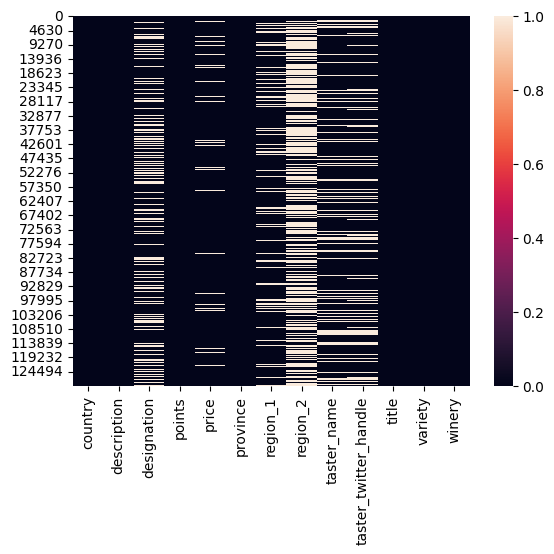

In [42]:
sns.heatmap(data.isnull())

In [43]:
df = data.drop(['region_2'], axis=1)

In [44]:
df.describe(include='all')

country                                        description designation  \
count   119929                                             119988       85443   
unique      43                                             119955       37979   
top         US  This opens with subtle aromas of wild flower a...     Reserve   
freq     50457                                                  2        1871   
mean       NaN                                                NaN         NaN   
std        NaN                                                NaN         NaN   
min        NaN                                                NaN         NaN   
25%        NaN                                                NaN         NaN   
50%        NaN                                                NaN         NaN   
75%        NaN                                                NaN         NaN   
max        NaN                                                NaN         NaN   

               points          price    province     region_1 taster_name  \
count   119988.000000  111593.000000      119929       100428       95071   
unique            NaN            NaN         425         1229          19   
top               NaN            NaN  California  Napa Valley  Roger Voss   
freq              NaN            NaN       33656         4174       23560   
mean        88.442236      35.620747         NaN          NaN         NaN   
std          3.092915      42.103728         NaN          NaN         NaN   
min         80.000000       4.000000         NaN          NaN         NaN   
25%         86.000000      17.000000         NaN          NaN         NaN   
50%         88.000000      25.000000         NaN          NaN         NaN   
75%         91.000000      42.000000         NaN          NaN         NaN   
max        100.000000    3300.000000         NaN          NaN         NaN   

       taster_twitter_handle  \
count                  90542   
unique                    15   
top               @vossroger   
freq                   23560   
mean                     NaN   
std                      NaN   
min                      NaN   
25%                      NaN   
50%                      NaN   
75%                      NaN   
max                      NaN   

                                                    title     variety  \
count                                              119988      119987   
unique                                             118840         707   
top     Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...  Pinot Noir   
freq                                                    9       12278   
mean                                                  NaN         NaN   
std                                                   NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   

                    winery  
count               119988  
unique               16757  
top     Wines & Winemakers  
freq                   211  
mean                   NaN  
std                    NaN  
min                    NaN  
25%                    NaN  
50%                    NaN  
75%                    NaN  
max                    NaN

In [45]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

df['designation'] = df['designation'].fillna('unknown')
df['region_1'] = df['region_1'].fillna('unknown')
df['taster_name'] = df['taster_name'].fillna('unknown')
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
df['country'] = df['country'].fillna('US')
df['price'] = df['price'].fillna(df['price'].mean())
df['province'] = df['province'].fillna('California')
df['variety'] = df['variety'].fillna('Pinot Noir')

In [46]:
# в числовом признаке выберем метод замены средним значением
df['price'] = df['price'].fillna(df['price'].mean())

In [47]:
# сохраняем очищенный датасет для дальнейшей работы
df.to_csv('data/wine_cleared.csv', index=False) 

In [50]:
profile = ProfileReport(df, title="Pandas Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("your_report.html")

In [1]:
import statistics

In [12]:
df=pd.read_csv('data/wine_cleared.csv') 

In [17]:
# Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. 
st.mode(df['price'])

35.363389129985535

In [16]:
df['price'].median()

28.0

In [20]:
df.corr(numeric_only=True)

Unnamed: 0    points     price
Unnamed: 0    1.000000  0.007124  0.004652
points        0.007124  1.000000  0.402137
price         0.004652  0.402137  1.000000

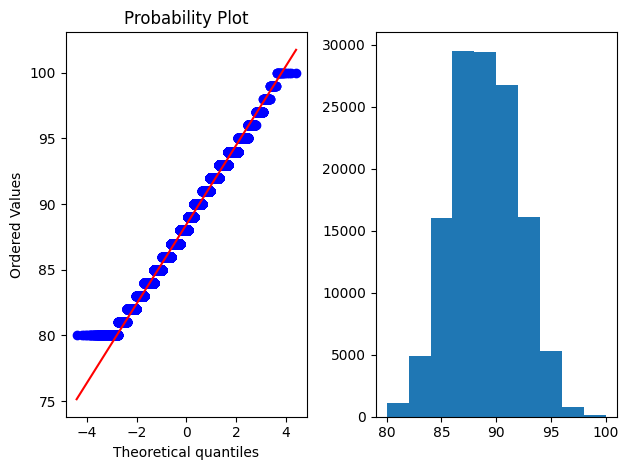

In [22]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

In [23]:
df.corr(method = 'spearman', numeric_only=True)

Unnamed: 0    points     price
Unnamed: 0    1.000000  0.009378  0.003751
points        0.009378  1.000000  0.581095
price         0.003751  0.581095  1.000000

In [24]:
df.corr(method = 'kendall', numeric_only=True)

Unnamed: 0    points     price
Unnamed: 0    1.000000  0.006536  0.002533
points        0.006536  1.000000  0.433498
price         0.002533  0.433498  1.000000

In [26]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

In [27]:
data = pd.read_csv('data/model.csv')

In [29]:
data.corr(numeric_only=True)

Year     Waist      Hips    Height    Weight       BMI  \
Year       1.000000  0.292518 -0.281576  0.284482 -0.010753  0.025309   
Waist      0.292518  1.000000  0.283060  0.372637  0.452704  0.136549   
Hips      -0.281576  0.283060  1.000000  0.228054  0.541836  0.211395   
Height     0.284482  0.372637  0.228054  1.000000  0.706569 -0.037934   
Weight    -0.010753  0.452704  0.541836  0.706569  1.000000  0.212701   
BMI        0.025309  0.136549  0.211395 -0.037934  0.212701  1.000000   
Waist/Hip  0.458945  0.742284 -0.422412  0.198754  0.067543 -0.010173   

           Waist/Hip  
Year        0.458945  
Waist       0.742284  
Hips       -0.422412  
Height      0.198754  
Weight      0.067543  
BMI        -0.010173  
Waist/Hip   1.000000

<Axes: >

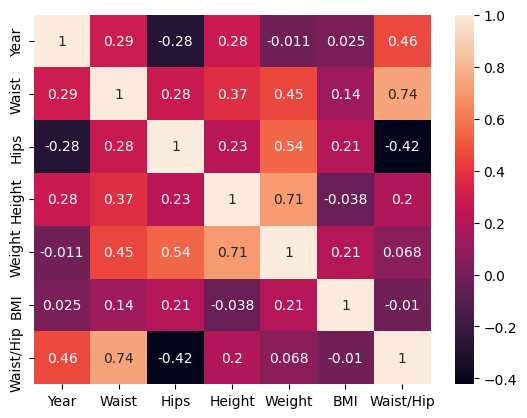

In [32]:
sns.heatmap(data.corr(numeric_only=True), annot = True)

<Axes: xlabel='Waist/Hip', ylabel='Waist'>

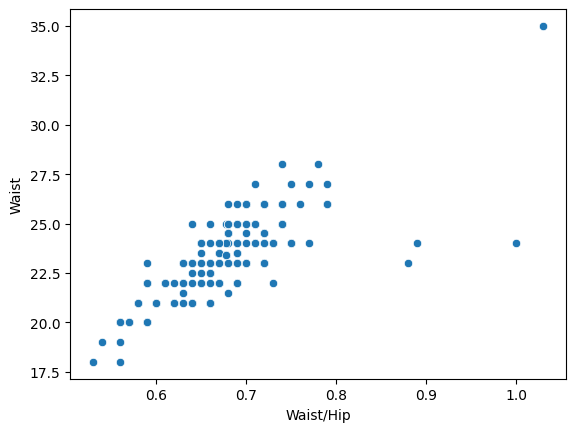

In [33]:
sns.scatterplot(data=data, x="Waist/Hip", y="Waist")

<Axes: xlabel='Weight', ylabel='Year'>

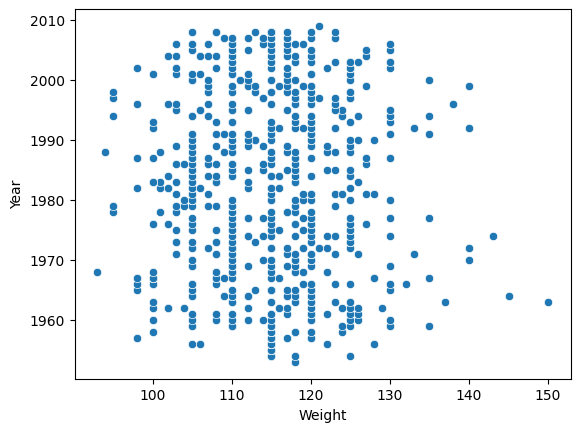

In [34]:
sns.scatterplot(data=data, x="Weight", y="Year")

c:\Users\redd-\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


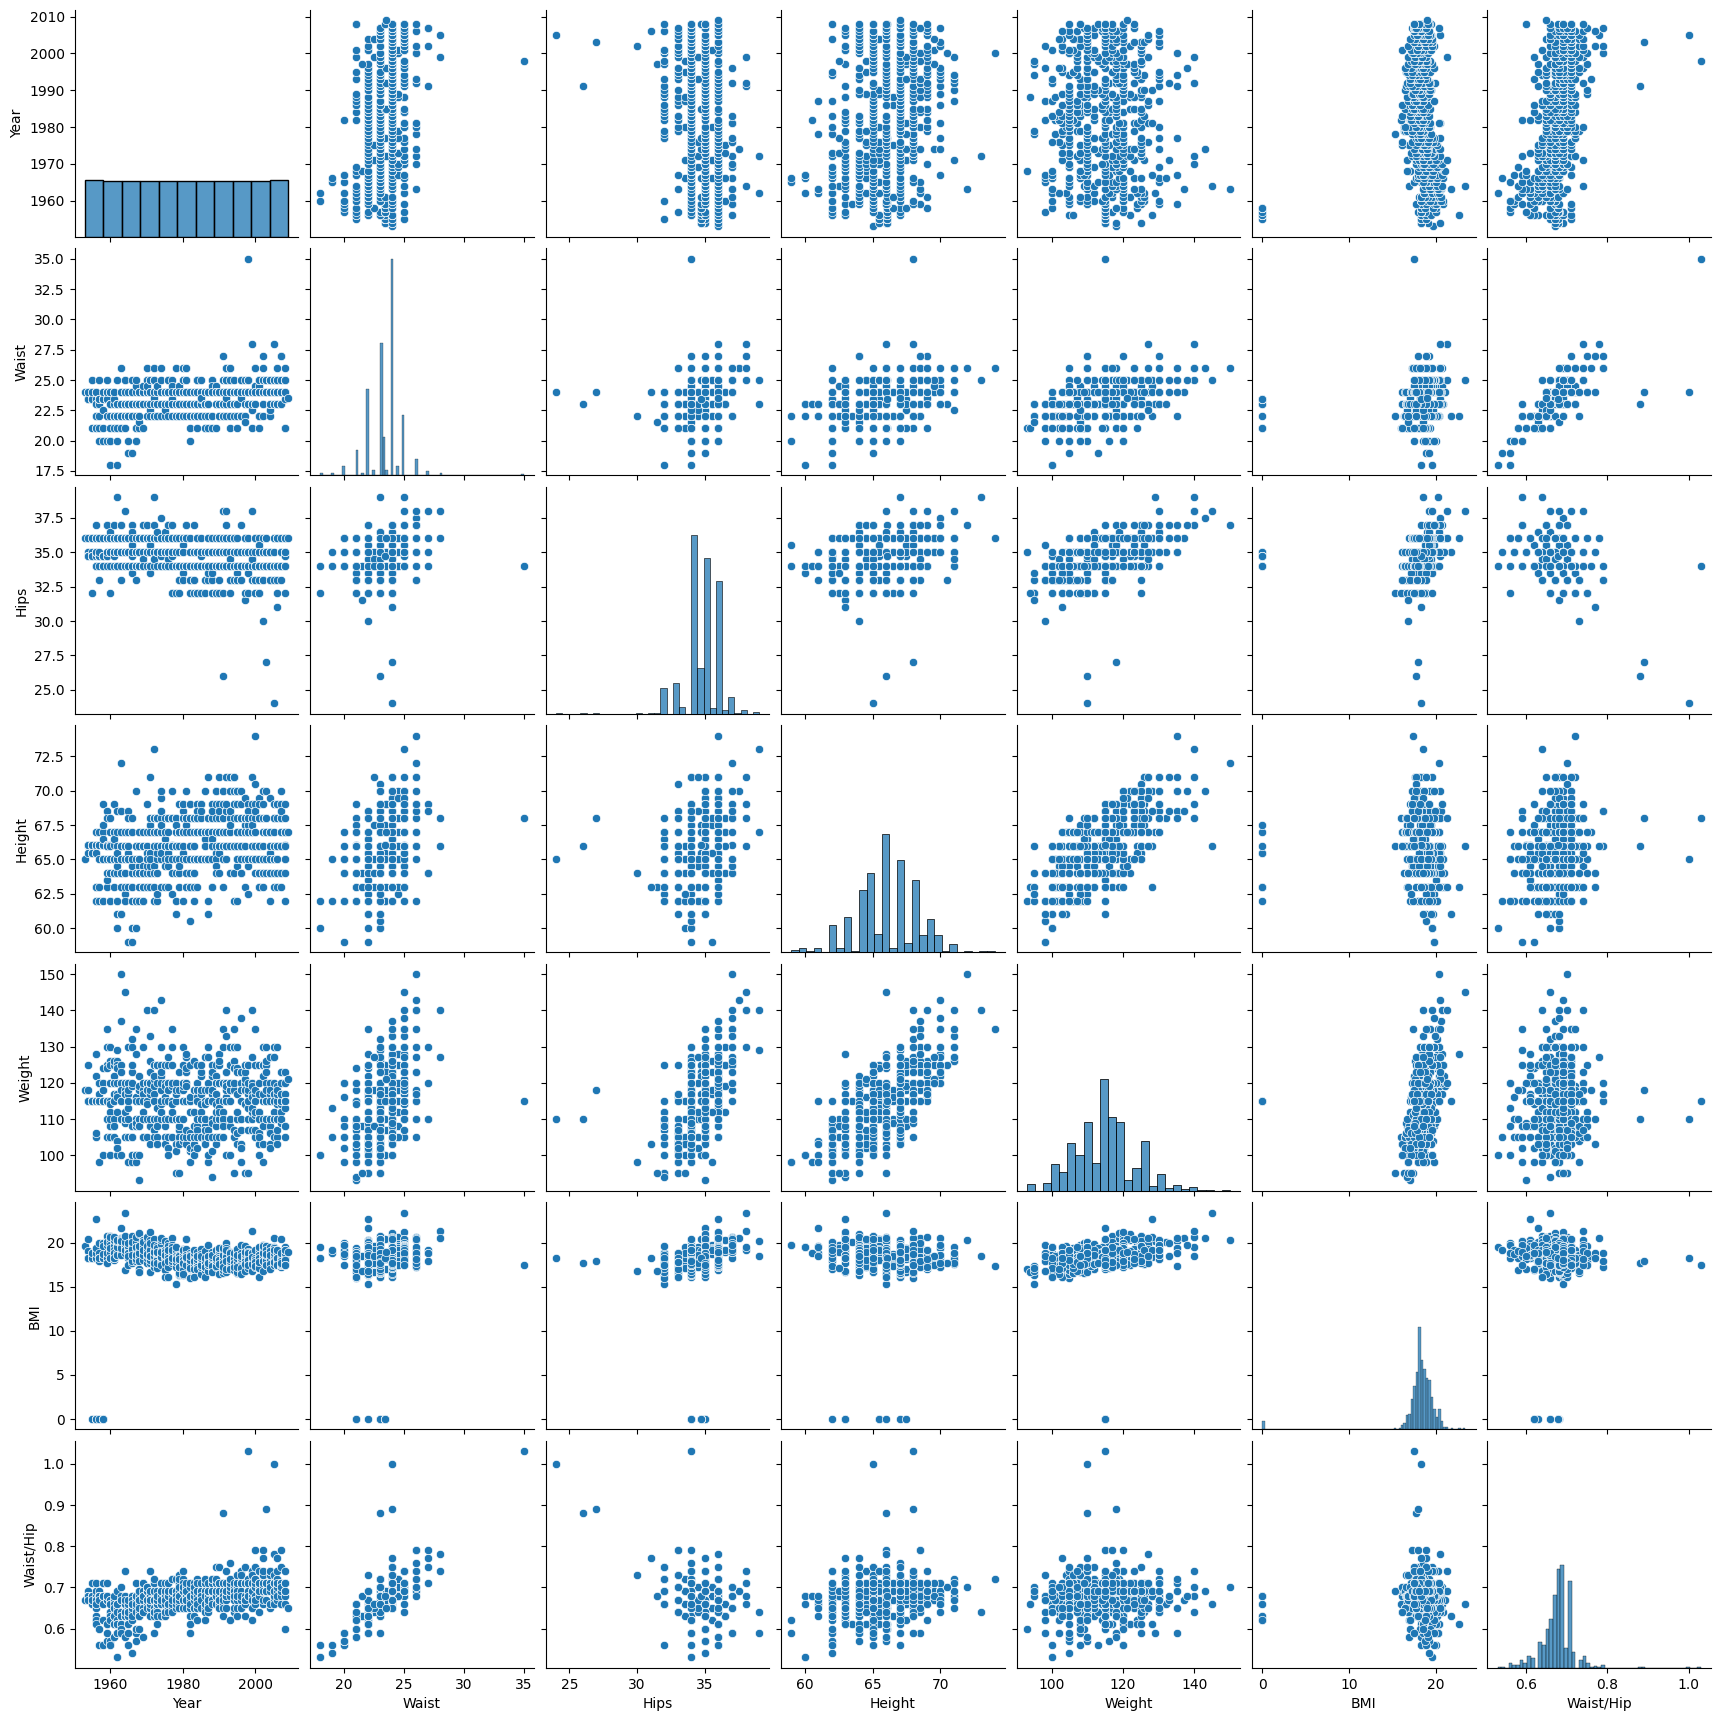

In [35]:
sns.pairplot(data)

In [37]:
st.mean(data['Weight'])

114.93606557377049

In [38]:
st.mean(data['Height'])

66.05725806451613

## проектирование признаков

In [11]:
data = pd.read_csv('data/wine_cleared.csv')

In [4]:
# Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)

In [5]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [6]:
data['country'].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [7]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [8]:
data['is_france'].sum()

22093

In [9]:
data['is_italy'].sum()

19540

In [21]:
data['year'].isna().value_counts()

year
False    125362
True       4609
Name: count, dtype: int64

In [36]:
data['year'][data['year']=='2020'].value_counts()

year
2020    4609
Name: count, dtype: int64

In [34]:
data['year'] = data['year'].fillna(value='2020')

In [35]:
data['year'].isna().value_counts()

year
False    129971
Name: count, dtype: int64

In [37]:
data['old_wine'] = data['year'].apply(lambda x: 1 if int(x) < 2010 else 0)

In [38]:
data['old_wine'].sum()

39781

In [9]:
display(data['title'].iloc[129966])


'Dr. H. Thanisch (Erben Müller-Burggraef) 2013 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel)'

In [10]:
def place(pl):
    pl = pl.split('(')[-1]
    pl=pl[:-1]
    return pl

loct = 'Dr. H. Thanisch (Erben Müller-Burggraef) 2013 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel)'
print(place(loct))

Mosel


In [11]:
data['locality']=data['title'].apply(place)

In [12]:
display(data)

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  \
0               @kerinokeefe   
1                 @vossroger   
2                @paulgwine    
3                    unknown   
4                @paulgwine    
...                      ...   
129966               unknown   
129967           @paulgwine    
129968            @vossroger   
129969            @vossroger   
129970            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pi

In [15]:
import re

In [33]:
result = re.split(r'\(|\)', 'Dr. H. Thanisch (Erben Müller-Burggraef) 2013 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel)')
result2 = re.split(r'\(|\)', 'Domaine Marcel Deiss 2012 Pinot Gris (Alsace)')[-2]
print(result2)
data['locality']=data['title'].apply(lambda x: re.split(r'\(|\)', x)[-2]) #это правильно вау.

Alsace


In [35]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

In [36]:
country_population[country_population['country']=='Italy']

country  population
24   Italy  59,097,904

In [38]:
data = data.join(country_population.set_index('country'), on='country')
data.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery             locality   population  
0              Nicosia                 Etna   59,097,904  
1  Quinta dos Avidagos                Douro   10,347,892  
2            Rainstorm    Willamette Valley  333,022,386  
3           St. Julian  Lake Michigan Shore  333,022,386  
4         Sweet Cheeks    Willamette Valley  333,022,386

In [40]:
country_area = pd.read_csv('data/country_area.csv', sep=';')

In [41]:
data = data.join(country_area.set_index('country'), on='country')
data.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery             locality   population       area  
0              Nicosia                 Etna   59,097,904   301230.0  
1  Quinta dos Avidagos                Douro   10,347,892    92391.0  
2            Rainstorm    Willamette Valley  333,022,386  9372610.0  
3           St. Julian  Lake Michigan Shore  333,022,386  9372610.0  
4         Sweet Cheeks    Willamette Valley  333,022,386  9372610.0

In [43]:
data[data['title']=='Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

Unnamed: 0 country                                        description  \
94          94      US  Barrel notes are prominent, with aromas of Cre...   

                                designation  points  price    province  \
94  Grand Klasse Reserve Lawrence Vineyards      88   22.0  Washington   

                region_1       taster_name taster_twitter_handle  \
94  Columbia Valley (WA)  Sean P. Sullivan         @wawinereport   

                                                title   variety winery  \
94  Gård 2014 Grand Klasse Reserve Lawrence Vineya...  Viognier   Gård   

   locality   population       area  
94      WA)  333,022,386  9372610.0

### Дата время

In [1]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

client_id          agent_date          created_at            end_date
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32

In [3]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  
0         1                5  
1       231                2  
2       104                0  
3         2                7  
4       215                1  
5        95                5  
6        92                2  
7       215                0  
8        94                1  
9         6               66

In [4]:
calls['time_connection'].sum()

89

In [5]:
calls['is_connection']=calls['duration'].apply(lambda x: 1 if x>10 else 0)
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  is_connection  
0         1                5              0  
1       231                2              1  
2       104                0              1  
3         2                7              0  
4       215                1              1  
5        95                5              1  
6        92                2              1  
7       215                0              1  
8        94                1              1  
9         6               66              0

In [6]:
calls['is_connection'].sum()

7

In [7]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls

client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  is_connection  time_diff  
0         1                5              0          6  
1       231                2              1        233  
2       104                0              1        104  
3         2                7              0          9  
4       215                1              1        216  
5        95                5              1        100  
6        92                2              1         94  
7       215                0              1        215  
8        94                1              1         95  
9         6               66              0         72

In [8]:
calls['time_diff'].sum()

1144

In [9]:
# удаляем исходные признаки, тк они бесполезны для модели
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [63]:
data = pd.read_csv('data/wine_cleared.csv')

In [64]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

In [65]:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')

In [66]:
data['years_diff'] = (pd.to_datetime('2022-01-12') - data['year'])
data['years_diff'].max()

Timedelta('98627 days 00:00:00')

### Категории

In [67]:
import category_encoders as ce

In [68]:
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

size   type
0  xxs  dress
1  xxs  skirt
2   xs  dress
3    s  skirt
4    m  dress
5    l  shirt
6    s   coat
7    m   coat
8  xxl  shirt
9    l  dress

In [69]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

size   type  size
0   xxs  dress     1
1   xxs  skirt     1
2    xs  dress     2
3     s  skirt     3
4     m  dress     4
5     l  shirt     5
6     s   coat     3
7     m   coat     4
8   xxl  shirt     6
9     l  dress     5

In [70]:
# Используем класс OneHotEncoding библиотеки category_encoders. 
# Укажем в cols наименование признака type для кодировки
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

size   type  size  type_dress  type_skirt  type_shirt  type_coat
0   xxs  dress     1           1           0           0          0
1   xxs  skirt     1           0           1           0          0
2    xs  dress     2           1           0           0          0
3     s  skirt     3           0           1           0          0
4     m  dress     4           1           0           0          0
5     l  shirt     5           0           0           1          0
6     s   coat     3           0           0           0          1
7     m   coat     4           0           0           0          1
8   xxl  shirt     6           0           0           1          0
9     l  dress     5           1           0           0          0

In [71]:
data['country'].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [72]:
#кодируем страну двоичным кодированием
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)

In [13]:
data

Unnamed: 0   country  \
0                0     Italy   
1                1  Portugal   
2                2        US   
3                3        US   
4                4        US   
...            ...       ...   
129966      129966   Germany   
129967      129967        US   
129968      129968    France   
129969      129969    France   
129970      129970    France   

                                              description  \
0       Aromas include tropical fruit, broom, brimston...   
1       This is ripe and fruity, a wine that is smooth...   
2       Tart and snappy, the flavors of lime flesh and...   
3       Pineapple rind, lemon pith and orange blossom ...   
4       Much like the regular bottling from 2012, this...   
...                                                   ...   
129966  Notes of honeysuckle and cantaloupe sweeten th...   
129967  Citation is given as much as a decade of bottl...   
129968  Well-drained gravel soil gives this wine its c...   
129969  A dry style of Pinot Gris, this is crisp with ...   
129970  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1                                     Avidagos      87  15.000000   
2                                      unknown      87  14.000000   
3                         Reserve Late Harvest      87  13.000000   
4           Vintner's Reserve Wild Child Block      87  65.000000   
...                                        ...     ...        ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90  28.000000   
129967                                 unknown      90  75.000000   
129968                                   Kritt      90  30.000000   
129969                                 unknown      90  32.000000   
129970           Lieu-dit Harth Cuvée Caroline      90  21.000000   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro              unknown          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel              unknown  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  ... country_1 country_2 country_3  country_4  \
0               @kerinokeefe  ...         0         0         0          0   
1                 @vossroger  ...         0         0         0          1   
2                @paulgwine   ...         0         0         0          1   
3                    unknown  ...         0         0         0          1   
4                @paulgwine   ...         0         0         0          1   
...                      ...  ...       ...       ...       ...        ...   
129966               unknown  ...         0         0         1          1   
129967           @paulgwine   ...         0         0         0          1   
129968            @vossroger  ...         0         0         1          0   
129969            @vossroger  ...         0         0         1          0   
129970            @vossroger  ...         0         0         1          0   

        country_5  taster_twitter_handle_0  taster_twitter_handle_1  \
0               1                        0                        0   
1               0                        0                        0   
2               1                        0                        0   

In [73]:
#кодируем твиттер двоичным кодированием
bin_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)

In [74]:
data.to_csv('data/wine_cleared_fchrs.csv', index=False) 

## <font color='yellow'>Нормализация</font>

In [1]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

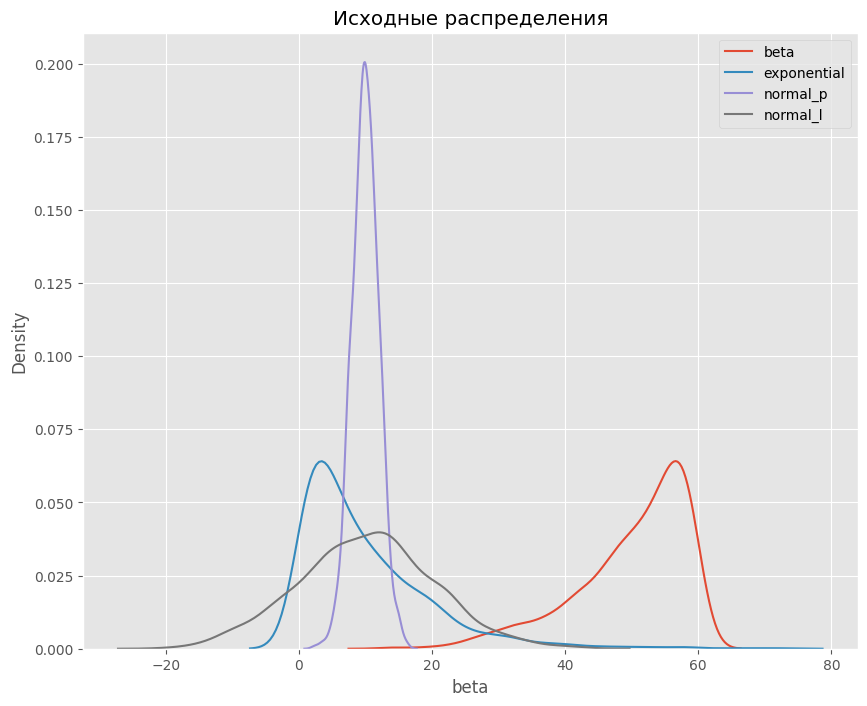

In [3]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [4]:
df.describe()

beta  exponential     normal_p     normal_l
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     50.024249    10.028387     9.994006    10.175745
std       8.474545     9.733928     2.013971    10.104004
min      13.854022     0.007617     2.356844   -19.539980
25%      45.793283     2.951421     8.687478     3.566822
50%      52.337504     7.018565     9.983498    10.326331
75%      56.722191    14.022485    11.306914    16.615057
max      59.990640    71.344341    16.214364    42.072915

<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

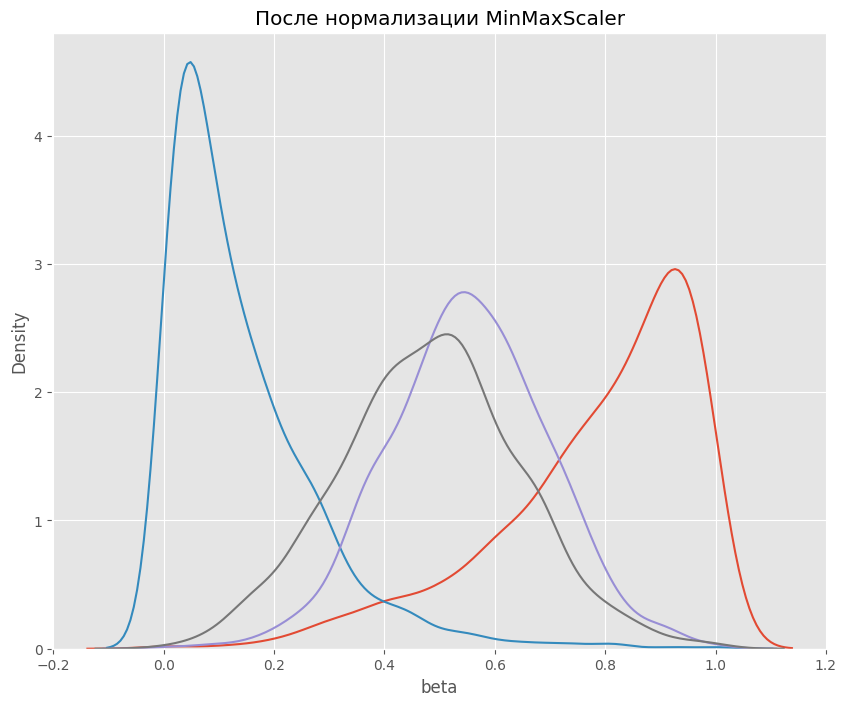

In [7]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

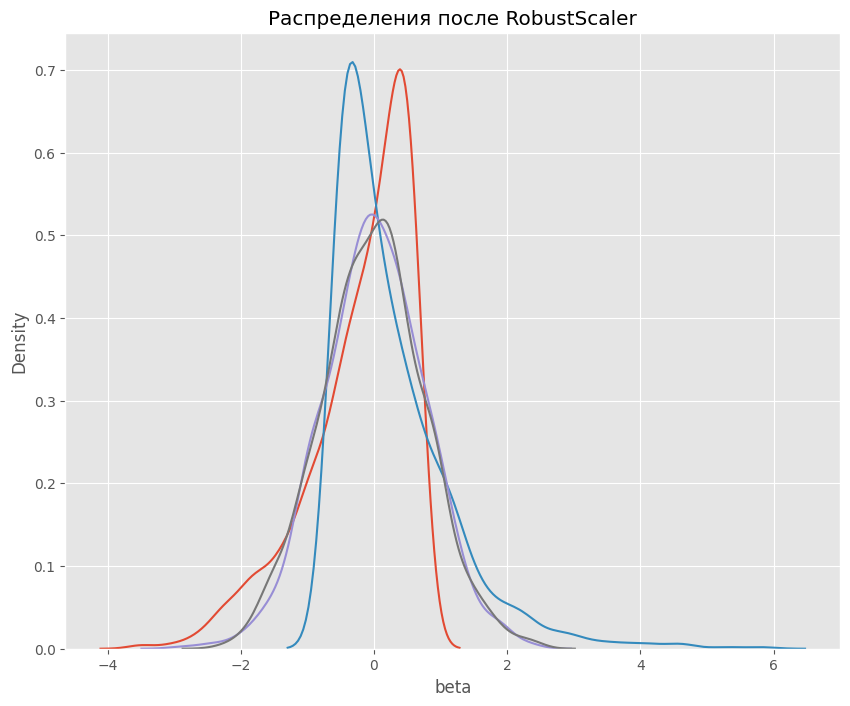

In [8]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

## <font color='yellow'>Стандартизация</font>

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

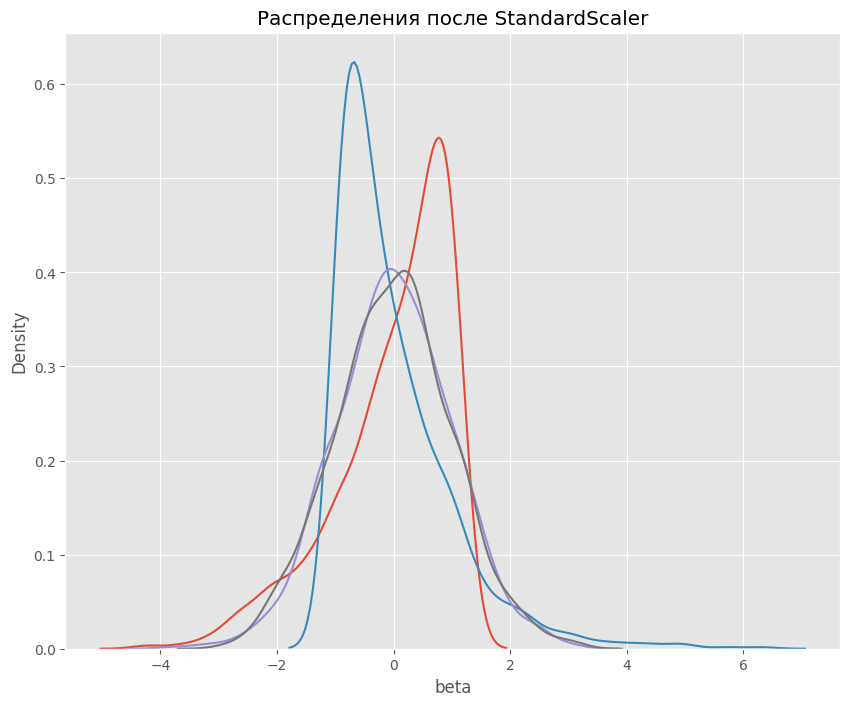

In [9]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [29]:
display(data.iloc[:,[4,5]])

points      price
0           87  35.363389
1           87  15.000000
2           87  14.000000
3           87  13.000000
4           87  65.000000
...        ...        ...
129966      90  28.000000
129967      90  75.000000
129968      90  30.000000
129969      90  32.000000
129970      90  21.000000

[129971 rows x 2 columns]

In [48]:
data_r = pd.DataFrame(data['price']).copy()

In [49]:
col_names = list(data_r.columns)

<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='price', ylabel='Density'>

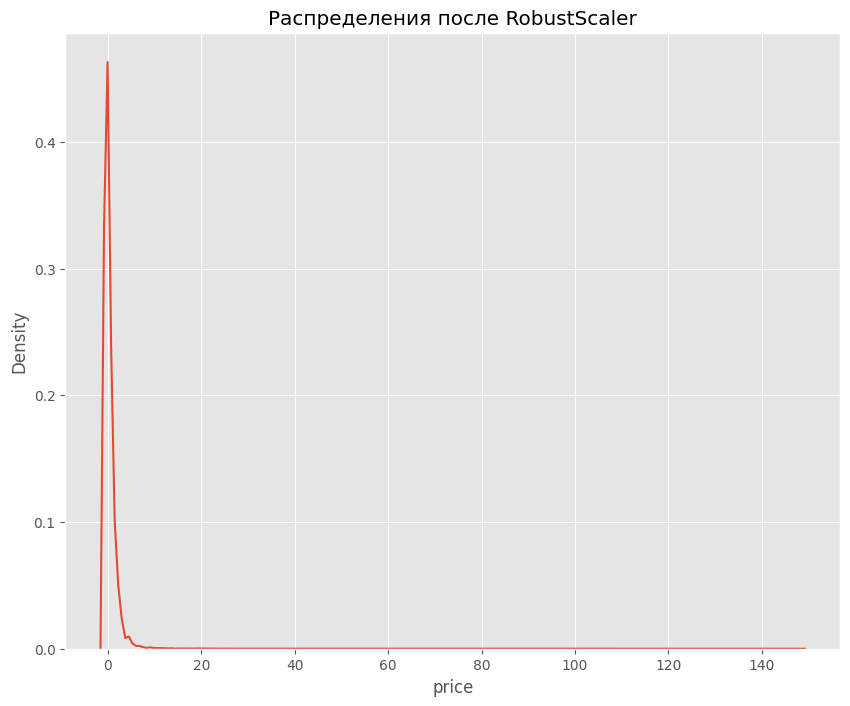

In [50]:
data_r = r_scaler.fit_transform(data_r)
data_r = pd.DataFrame(data_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(data_r['price'], ax=ax1)

In [51]:

display(data_r)

price
0       0.334700
1      -0.590909
2      -0.636364
3      -0.681818
4       1.681818
...          ...
129966  0.000000
129967  2.136364
129968  0.090909
129969  0.181818
129970 -0.318182

[129971 rows x 1 columns]

In [53]:
data_r['price'].sum()

43501.229482424984

In [54]:
data_s = pd.DataFrame(data['price']).copy()

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='price', ylabel='Density'>

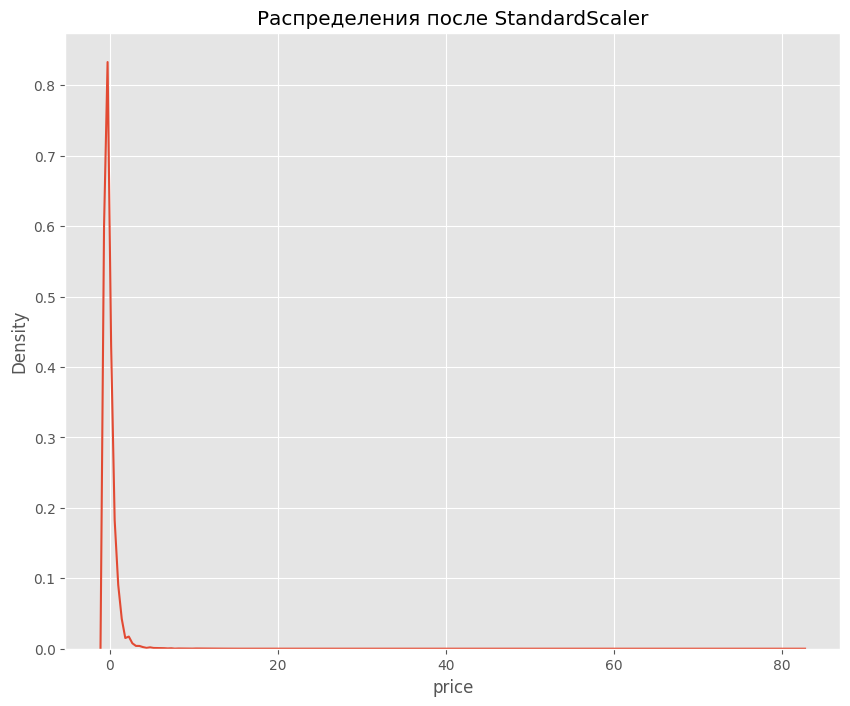

In [55]:
data_s = s_scaler.fit_transform(data_s)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
data_s = pd.DataFrame(data_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(data_s['price'], ax=ax1)


In [57]:
round(data_s['price'][129968], 2)

-0.14

## <font color='yellow'>Отбор признаков</font>

In [58]:
iris = pd.read_csv('data\iris.csv')
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

<Axes: >

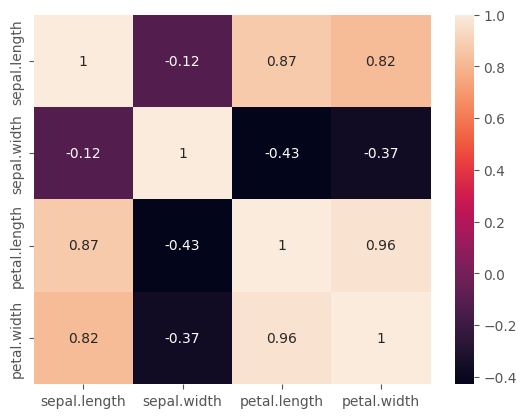

In [59]:
# Проведём корреляционный анализ датасета
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

удалим признаки с очень сильной корреляцией (где коэффициент корреляции +/-0.7 и выше). </br>
Начнём с самого высокого коэффициента корреляции в паре признаков: petal.width и petal.length 0,96. Удалим любой признак из этой пары, например petal.width, так как он коррелирует ещё и с признаком sepal.length:

In [60]:
iris = iris.drop(['petal.width'], axis=1)

In [61]:
# второй признак petal.length из этой пары также сильно коррелирует с признаком sepal.length
iris = iris.drop(['petal.length'], axis=1)

In [62]:
iris.head()

sepal.length  sepal.width variety
0           5.1          3.5  Setosa
1           4.9          3.0  Setosa
2           4.7          3.2  Setosa
3           4.6          3.1  Setosa
4           5.0          3.6  Setosa

In [83]:
wine = pd.read_csv('data/wine_cleared_fchrs.csv')
wine.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points      price           province  \
0                        Vulkà Bianco      87  35.363389  Sicily & Sardinia   
1                            Avidagos      87  15.000000              Douro   
2                             unknown      87  14.000000             Oregon   
3                Reserve Late Harvest      87  13.000000           Michigan   
4  Vintner's Reserve Wild Child Block      87  65.000000             Oregon   

              region_1         taster_name taster_twitter_handle  \
0                 Etna       Kerin O’Keefe          @kerinokeefe   
1              unknown          Roger Voss            @vossroger   
2    Willamette Valley        Paul Gregutt           @paulgwine    
3  Lake Michigan Shore  Alexander Peartree               unknown   
4    Willamette Valley        Paul Gregutt           @paulgwine    

                                               title  ... country_1 country_2  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)  ...         0         0   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  ...         0         0   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)  ...         0         0   
3  St. Julian 2013 Reserve Late Harvest Riesling ...  ...         0         0   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...  ...         0         0   

  country_3 country_4  country_5  taster_twitter_handle_0  \
0         0         0          1                        0   
1         0         1          0                        0   
2         0         1          1                        0   
3         0         1          1                        0   
4         0         1          1                        0   

   taster_twitter_handle_1  taster_twitter_handle_2  taster_twitter_handle_3  \
0                        0                        0                        0   
1                        0                        0                        1   
2                        0                        0                        1   
3                        0                        1                        0   
4                        0                        0                        1   

   taster_twitter_handle_4  
0                        1  
1                        0  
2                        1  
3                        0  
4                        1  

[5 rows x 25 columns]

In [82]:
wine.to_csv('data/wine_cleared_fchrs.csv', index=False) 

<Axes: >

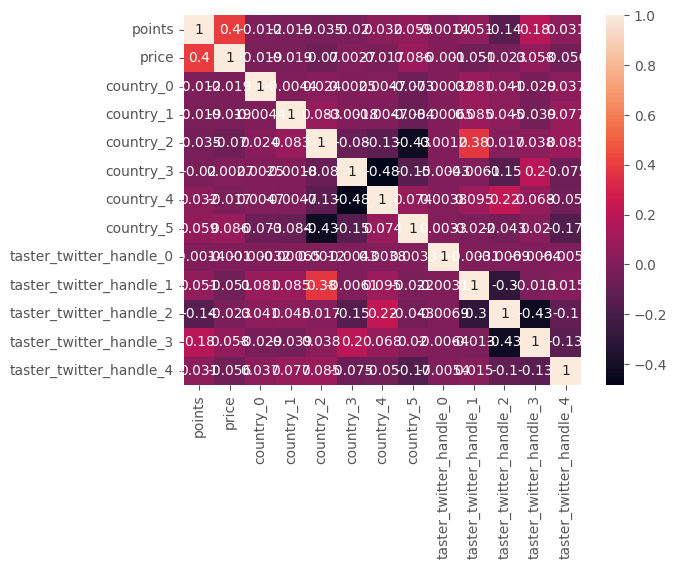

In [84]:
sns.heatmap(wine.corr(numeric_only=True), annot=True)

In [85]:
display(wine.corr(numeric_only=True))

points     price  country_0  country_1  country_2  \
points                   1.000000  0.402137  -0.012403  -0.019353  -0.035263   
price                    0.402137  1.000000  -0.019371  -0.018989  -0.070150   
country_0               -0.012403 -0.019371   1.000000  -0.004429   0.024431   
country_1               -0.019353 -0.018989  -0.004429   1.000000   0.083394   
country_2               -0.035263 -0.070150   0.024431   0.083394   1.000000   
country_3               -0.019866  0.002666   0.002516  -0.001792  -0.079704   
country_4                0.032217 -0.016745   0.004750  -0.004744  -0.126260   
country_5                0.059090  0.085674  -0.073013  -0.083699  -0.427857   
taster_twitter_handle_0 -0.001372 -0.001035  -0.000316  -0.000648   0.001166   
taster_twitter_handle_1  0.050513 -0.051187   0.080986   0.084750   0.378495   
taster_twitter_handle_2 -0.140646 -0.022779   0.040980   0.044543   0.017295   
taster_twitter_handle_3  0.183249  0.058049  -0.028637  -0.038993   0.038071   
taster_twitter_handle_4  0.030897 -0.056473   0.037035   0.076980   0.085043   

                         country_3  country_4  country_5  \
points                   -0.019866   0.032217   0.059090   
price                     0.002666  -0.016745   0.085674   
country_0                 0.002516   0.004750  -0.073013   
country_1                -0.001792  -0.004744  -0.083699   
country_2                -0.079704  -0.126260  -0.427857   
country_3                 1.000000  -0.484472  -0.145376   
country_4                -0.484472   1.000000   0.073950   
country_5                -0.145376   0.073950   1.000000   
taster_twitter_handle_0  -0.004340   0.003788   0.003294   
taster_twitter_handle_1  -0.006106   0.094651  -0.021565   
taster_twitter_handle_2  -0.150352   0.224908  -0.043146   
taster_twitter_handle_3   0.196550   0.067808   0.019922   
taster_twitter_handle_4  -0.074624  -0.049675  -0.170288   

                         taster_twitter_handle_0  taster_twitter_handle_1  \
points                                 -0.001372                 0.050513   
price                                  -0.001035                -0.051187   
country_0                              -0.000316                 0.080986   
country_1                              -0.000648                 0.084750   
country_2                               0.001166                 0.378495   
country_3                              -0.004340                -0.006106   
country_4                               0.003788                 0.094651   
country_5                               0.003294                -0.021565   
taster_twitter_handle_0                 1.000000                -0.003061   
taster_twitter_handle_1                -0.003061                 1.000000   
taster_twitter_handle_2                -0.006919                -0.296352   
taster_twitter_handle_3                -0.006376                -0.013313   
taster_twitter_handle_4                -0.005431                 0.014574   

                         taster_twitter_handle_2  taster_twitter_handle_3  \
points                                 -0.140646                 0.183249   
price                                  -0.022779                 0.058049   
country_0                               0.040980                -0.028637   
country_1                               0.044543                -0.038993   
country_2                               0.017295                 0.038071   
country_3                              -0.150352                 0.196550   
country_4                               0.224908                 0.067808   
country_5                              -0.043146                 0.019922   
taster_twitter_handle_0                -0.006919                -0.006376   
taster_twitter_handle_1                -0.296352                -0.013313   
taster_twitter_handle_2                 1.000000                -0.431876   
taster_twitter_handle_3                -0.431876              

Датасет болезней сердца

- age — возраст
- sex — пол (1 - мужчина, 0 - женщина)
- cp — тип боли в груди (4 значения)
- trestbps — артериальное давление в покое
- chol — холестерин сыворотки в мг/дл
- fbs — уровень сахара в крови натощак > 120 мг/дл
- restecg — результаты электрокардиографии в покое (значения 0,1,2)
- thalach — достигнута максимальная частота сердечных сокращений
- exang — стенокардия, вызванная физической нагрузкой
- oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- slope — наклон пикового сегмента ST при нагрузке
- ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
- thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [86]:
heart = pd.read_csv('data/heart.csv')
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [87]:
heart['old'] =heart['age'].apply(lambda x: 1 if x>60 else 0)
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  old  
0   0     1       1    1  
1   0     2       1    0  
2   0     2       1    0  
3   0     2       1    0  
4   0     2       1    0

In [88]:
heart['old'].sum()

79

In [91]:
bp = pd.read_csv('data/blprshr.csv', sep=';')
bp.head()

Возраст (лет) Мужчины Женщины
0         до 20  123/76  116/72
1         21-30  126/79  120/75
2         31-40  129/81  127/80
3         41-50  135/83  137/84
4         51-60  142/85  144/85

In [92]:
bp['age_c'] = bp.index
bp.head()

Возраст (лет) Мужчины Женщины  age_c
0         до 20  123/76  116/72      0
1         21-30  126/79  120/75      1
2         31-40  129/81  127/80      2
3         41-50  135/83  137/84      3
4         51-60  142/85  144/85      4

In [94]:
# разбиваем в основном датасете возраста пациентов по категориям age_c
heart['age_c'] =heart['age'].apply(lambda x: 0 if x<20 else (1 if x<30 else (2 if x<40 else (3 if x<50 else (4 if x<60 else 5)))))


In [95]:
display(heart)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  old  age_c  
0        0   0     1       1    1      5  
1        0   0     2       1    0      2  
2        2   0     2       1    0      3  
3        2   0     2       1    0      4  
4        2   0     2       1    0      4  
..     ...  ..   ...     ...  ...    ...  
298      1   0     3       0    0      4  
299      1   0     3       0    0      3  
300      1   2     3       0    1      5  
301      1   1     3       0    0      4  
302      1   1     2       0    0      4  

[303 rows x 16 columns]

In [99]:
bp['m'] = bp['Мужчины'].apply(lambda x: x[:3])
bp['f'] = bp['Женщины'].apply(lambda x: x[:3])

bp.head()

Возраст (лет) Мужчины Женщины  age_c    m    f
0         до 20  123/76  116/72      0  123  116
1         21-30  126/79  120/75      1  126  120
2         31-40  129/81  127/80      2  129  127
3         41-50  135/83  137/84      3  135  137
4         51-60  142/85  144/85      4  142  144

In [101]:
heart.head()

age_c  sex
0        5    1
1        2    1
2        3    0
3        4    1
4        4    0
..     ...  ...
298      4    0
299      3    1
300      5    1
301      4    1
302      4    0

[303 rows x 2 columns]

In [106]:
heart = heart.join(bp, on='age_c', rsuffix='r')

In [122]:
heart['trestbps_mean'] = heart.apply(lambda row: row['m'] if row['sex'] == 1 else row['f'], axis=1)

In [123]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   3       145   233    1        0      150      0      2.3  ...   
1   37    1   2       130   250    0        1      187      0      3.5  ...   
2   41    0   1       130   204    0        0      172      0      1.4  ...   
3   56    1   1       120   236    0        1      178      0      0.8  ...   
4   57    0   0       120   354    0        1      163      1      0.6  ...   

   target  old  age_c  Возраст (лет)  Мужчины  Женщины age_cr    m    f  \
0       1    1      5    61 и старше   142/80   159/85      5  142  159   
1       1    0      2          31-40   129/81   127/80      2  129  127   
2       1    0      3          41-50   135/83   137/84      3  135  137   
3       1    0      4          51-60   142/85   144/85      4  142  144   
4       1    0      4          51-60   142/85   144/85      4  142  144   

   trestbps_mean  
0            142  
1            129  
2            137  
3            142  
4            144  

[5 rows x 23 columns]

In [124]:
heart.iloc[300]

age                       68
sex                        1
cp                         0
trestbps                 144
chol                     193
fbs                        1
restecg                    1
thalach                  141
exang                      0
oldpeak                  3.4
slope                      1
ca                         2
thal                       3
target                     0
old                        1
age_c                      5
Возраст (лет)    61 и старше
Мужчины               142/80
Женщины               159/85
age_cr                     5
m                        142
f                        159
trestbps_mean            142
Name: 300, dtype: object

In [125]:
heart_OHE = heart.copy()

In [126]:
heart_OHE = pd.get_dummies(heart_OHE, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])

In [132]:
heart_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  age_c          303 non-null    int64  
 11  trestbps_mean  303 non-null    int64  
 12  cp_0           303 non-null    bool   
 13  cp_1           303 non-null    bool   
 14  cp_2           303 non-null    bool   
 15  cp_3           303 non-null    bool   
 16  restecg_0      303 non-null    bool   
 17  restecg_1      303 non-null    bool   
 18  restecg_2 

In [129]:
heart_OHE = heart_OHE.drop(['age_cr','Возраст (лет)', 'Мужчины', 'Женщины', 'm','f'], axis=1)

In [131]:
heart_OHE['trestbps_mean']=heart_OHE['trestbps_mean'].apply(lambda x: int(x))

In [133]:
heart_OHE.to_csv('data/heart_OHE.csv', index=False) 

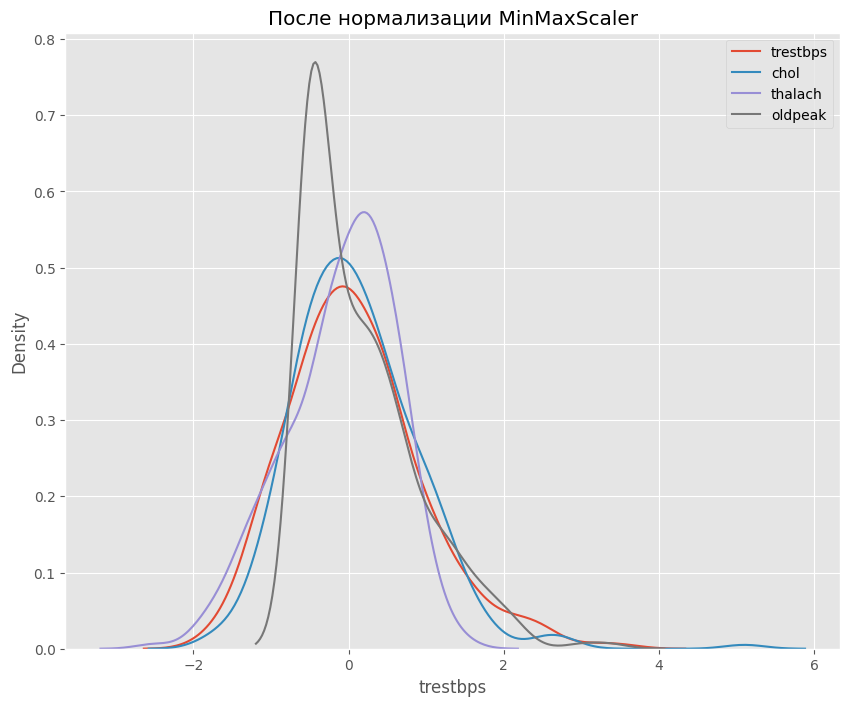

In [141]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.RobustScaler() # воимя хаоса!

# кодируем исходный датасет
heart_OHE_mm = mm_scaler.fit_transform(heart_OHE[['trestbps', 'chol', 'thalach', 'oldpeak']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_OHE_mm = pd.DataFrame(heart_OHE_mm, columns=['trestbps', 'chol', 'thalach', 'oldpeak'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler') # пхахаха

sns.kdeplot(heart_OHE_mm['trestbps'], ax=ax1, label ='trestbps')
sns.kdeplot(heart_OHE_mm['chol'], ax=ax1, label ='chol')
sns.kdeplot(heart_OHE_mm['thalach'], ax=ax1, label ='thalach')
sns.kdeplot(heart_OHE_mm['oldpeak'], ax=ax1, label ='oldpeak')
plt.legend()

In [142]:
round(heart_OHE_mm['chol'].std(), 6)

0.816232

<Axes: >

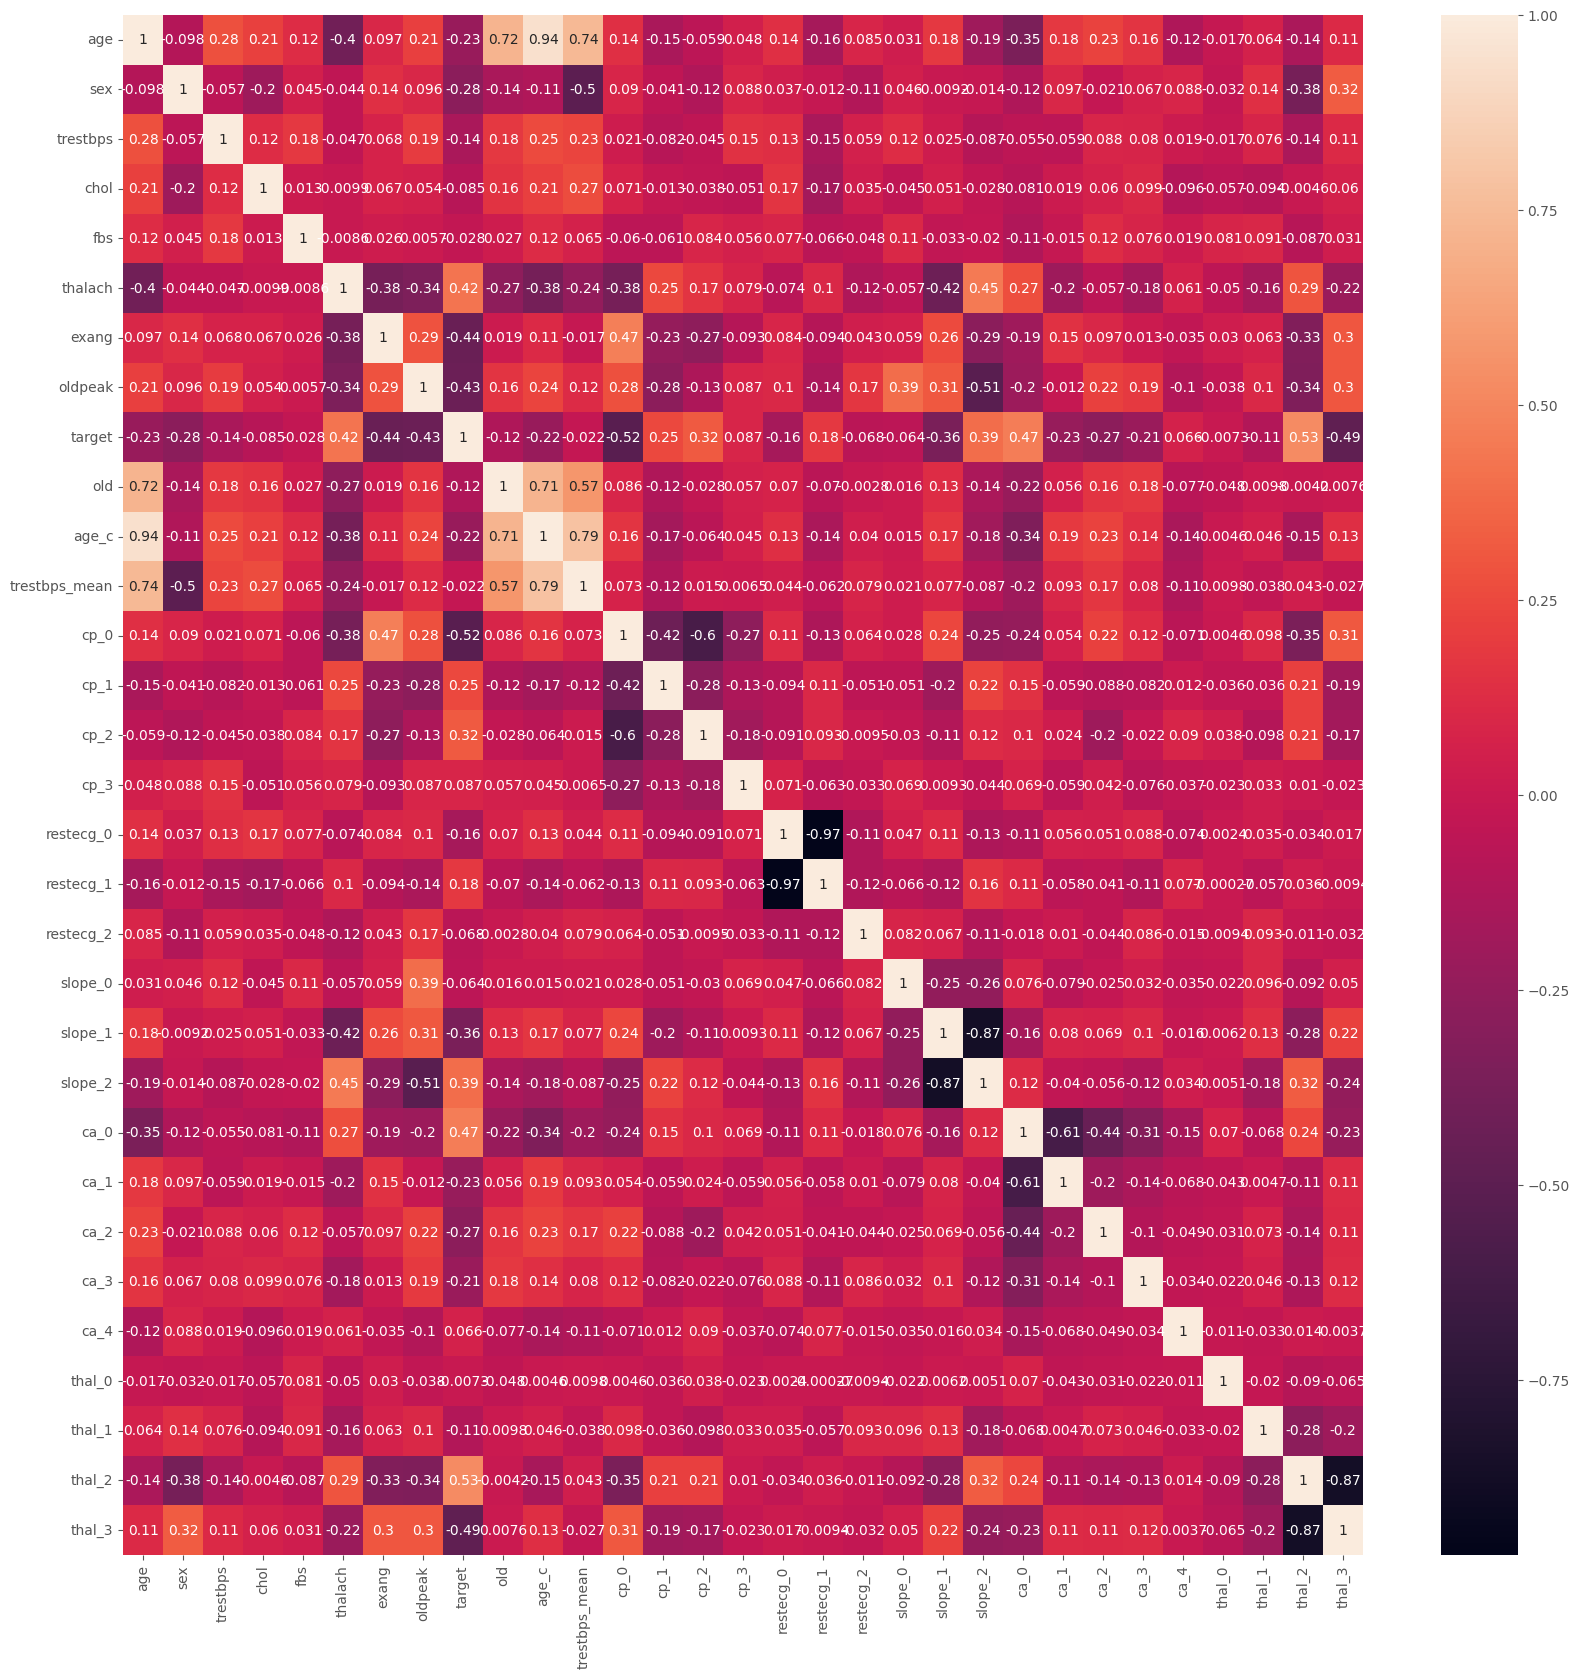

In [149]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(heart_OHE.corr(numeric_only=True), annot=True)

##   <font color='yellow'>Статистический анализ</font>

###  <font color='yellow'>НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ</font>

##### ГИСТОГРАММА
Рассмотрим эту функцию на примере датасета California Housing, входящего в состав sklearn. Построим гистограмму распределения целевого признака — стоимости домов:

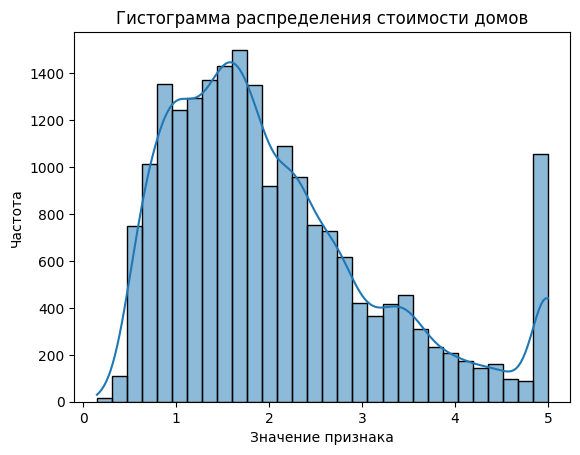

In [1]:
# импортируем библиотеки
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры гистограммы
ax = sns.histplot(data, bins=30, kde=True)
ax.set(xlabel='Значение признака', ylabel='Частота')
plt.title('Гистограмма распределения стоимости домов')

# отображаем гистограмму
plt.show()

Форма гистограммы несимметрична, с двумя пиками. Отсюда делаем промежуточный вывод: распределение стоимости домов не является нормальным.

##### КВАНТИЛЬ-КВАНТИЛЬ ГРАФИК 
В Python квантиль-квантиль график можно построить с помощью функции qqplot() пакета statsmodels. Построение квантиль-квантиль графика мы также рассмотрим на примере стоимости домов из датасета California Housing:

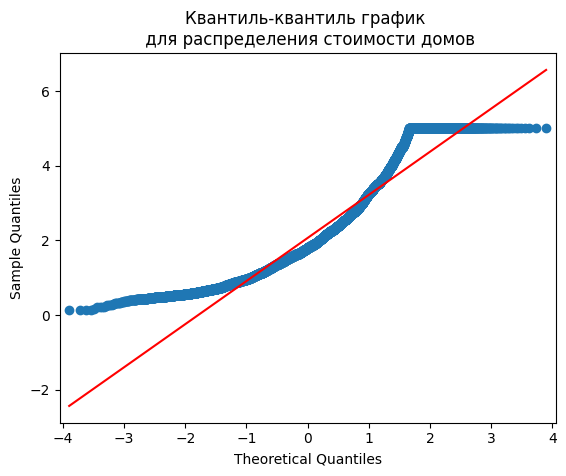

In [2]:
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
from matplotlib import pyplot as plt

# загружаем данные
dataset = datasets.fetch_california_housing()
data = dataset.target

# задаём параметры квантиль-квантиль графика
sm.qqplot(data, line='s')
plt.title('Квантиль-квантиль график \n для распределения стоимости домов')

# отображаем квантиль-квантиль график
plt.show()

Точки не располагаются на диагонали — распределение стоимости домов не является нормальным (как мы видели и по гистограмме).

##### Тест Шапиро — Уилка
В Python тест Шапиро — Уилка реализован в функции shapiro() пакета scipy. Эта функция принимает на вход выборочные данные, а выдаёт p-значение и дополнительный параметр — статистику теста. (здесь и далее мы будем ориентироваться только на значение p-value.)

In [4]:
# нормально ли распределение количества заказов в день в некотором интернет-магазине
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [12,  8,  9, 10, 11, 12,  7, 12,  2, 10,  3,  9, 18, 4, 11, 13, 13, 17, 14,  3, 10,  2,  2,  7, 14,  8, 20,  5,  7, 10]

# проводим тест Шапиро — Уилка
_, p = stats.shapiro(data)

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.414
Распределение нормальное


<font color='yellow'>ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ</font>

БИЗНЕС-ЗАДАЧА</br>
Компания закупает батареи для своих устройств и хочет проверить, правда ли, что батареи работают больше 40 часов. Для этого случайным образом выбрали 20 батарей, замерили время их работы и получили следующие данные в часах: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.</br>
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ</br>
Сформулируем гипотезы в математическом виде:</br>
Нулевая гипотеза: среднее время работы батареи ($\mu$) меньше или равно 40 часам.</br>
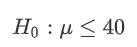 </br>
Альтернативная гипотеза: среднее время работы батареи ($\mu$) больше чем 40 часов.</br>
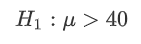</br>

In [8]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.018
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что время работы батарей стало больше, чем 40 часов.

<font color='yellow'>ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ</font>

БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».</br>
Для этого случайным образом выбрали по 20 батарей «Заряд» и «Планета», замерили время их работы и получили следующие данные в часах:</br>
Батареи «Заряд»: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.</br>
Батареи «Планета»: 40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36.</br>
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:</br>
Нулевая гипотеза: среднее время работы батарей «Планета» ($\mu_1$) меньше или равно среднему времени работы батарей «Заряд» ($\mu_2$).</br>
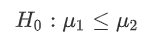</br>
Альтернативная гипотеза: среднее время работы батарей «Планета» ($\mu_1$) больше среднего времени работы батарей «Заряд» ($\mu_2$).</br>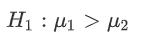



In [6]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что батареи «Планета» работают дольше, чем батареи «Заряд».

<font color='yellow'>ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)</font>

БИЗНЕС-ЗАДАЧА</br>
Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.</br>
Уровень значимости необходимо взять равным 0.05.</br>
Случайным образом выбрали по 20 батарей «Заряд», «Планета» и «Энергия», замерили время их работы и получили следующие данные в часах:</br>
Батареи «Заряд»: 31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34.</br>
Батареи «Планета»: 36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43.</br>
Батареи «Энергия»: 35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43.</br>

РЕШЕНИЕ</br>
Сформулируем гипотезы в математическом виде:</br>
Нулевая гипотеза: среднее время работы батарей «Заряд» ($\mu_1$), «Планета» ($\mu_2$) и «Энергия» ($\mu_3$) одинаковое.</br>
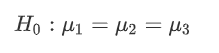</br>
Альтернативная гипотеза: среднее время работы батарей «Заряд» ($\mu_1$), «Планета» ($\mu_2$) и «Энергия» ($\mu_3$) не одинаковое.</br>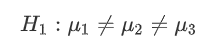


In [10]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.

<font color='yellow'>ПАРНЫЙ T-КРИТЕРИЙ</font>

БИЗНЕС-ЗАДАЧА

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Уровень значимости необходимо взять равным 0.05.

При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер, то есть результаты эксперимента оказались зависимыми.

Случайным образом выбрали по 10 батарей «Заряд» и «Планета». На каждом из устройств сначала замерили время работы батареи одного производителя, затем — второго и получили следующие данные в часах:

Батареи «Заряд»: 41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46.</br>
Батареи «Планета»: 45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:</br>
Нулевая гипотеза: среднее время работы батарей «Планета» ($\mu_1$) меньше или равно среднему времени работы батарей «Заряд» ($\mu_2$).</br>
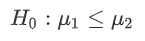</br>
Альтернативная гипотеза: среднее время работы батарей «Планета» ($\mu_1$) больше среднего времени работы батарей «Заряд» ($\mu_2$).</br>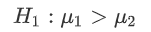

In [9]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: батареи «Планета» работают дольше, чем батареи «Заряд».

<font color='yellow'>ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ</font>

БИЗНЕС-ЗАДАЧА</br>
Компания закупает для своих устройств батареи у производителя «Заряд». Производители «Планета» и «Энергия» предлагают перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что между батареями трёх производителей есть разница во времени работы.</br>
Уровень значимости необходимо взять равным 0.05.</br>
При планировании эксперимента присутствовал эксперт, который сказал, что время работы батареи зависит от устройства, на котором проходит замер.</br>
Случайным образом выбрали по пять батарей «Заряд», «Планета» и «Энергия». На одном устройстве замерили время работы батареи одного производителя, затем — второго, затем — третьего и получили следующие данные в часах:</br>
Батареи «Заряд»: 36, 45, 41, 41, 35.</br>
Батареи «Планета»: 32, 34, 42, 48, 43.</br>
Батареи «Энергия»: 41, 39, 35, 34, 52.</br>

РЕШЕНИЕ</br>
Сформулируем гипотезы в математическом виде:</br>
Нулевая гипотеза: среднее время работы батарей «Заряд» ($\mu_1$), «Планета» ($\mu_2$) и «Энергия» ($\mu_3$) одинаковое.</br>
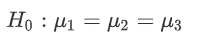</br>
Альтернативная гипотеза: среднее время работы батарей «Заряд» ($\mu_1$), «Планета» ($\mu_2$) и «Энергия» ($\mu_3$) не одинаковое.</br>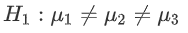

In [11]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})


# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



Обратите внимание, что для использования теста необходимо вызвать метод fit(). Формат информации, который возвращает функция AnovaRM(), сильно отличается от ранее рассмотренных тестов: p-value отображается в колонке Pr > F.

В нашем примере p-значение равно 0.99. P-значение больше, чем заданный уровень значимости 0.05. Таким образом, у нас нет оснований отвергнуть нулевую гипотезу.

Вывод: у нас нет оснований утверждать, что у батарей трёх производителей есть разница во времени работы.

задания

In [12]:
# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [117, 107, 29, 121, 86, 35, 117, 136, 89, 102, 131, 114, 118, 145, 67, 16, 102, 52, 144, 35, 72, 36, 103, 63, 73]
group_planeta = [56, 74, 94, 29, 76, 76, 61, 76, 65, 69, 78, 17, 65, 21, 35, 87, 53, 32, 18, 74, 28, 23, 67, 16, 98]
group_energiya = [141, 109, 120, 93, 57, 96, 84, 127, 130, 85, 99, 53, 51, 55, 103, 53, 103, 142, 112, 67, 139, 93, 83, 123, 111]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.150
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


In [13]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([21, 19, 25, 18, 32, 10, 26, 25, 35, 26, 23, 37, 30, 40, 29, 35, 28, 39, 26, 32, 40, 29, 44, 34, 37, 12, 37, 23, 33, 42])
data_planeta = np.array([23, 17, 41, 25, 9, 22, 18, 42, 27, 29, 30, 23, 38, 14, 27, 29, 28, 18, 19, 26, 29, 25, 32, 26, 47, 50, 30, 30, 36, 16])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='less')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.213
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


###  <font color='yellow'>Непараметрические тесты</font>

<font color='yellow'>КРИТЕРИЙ ЗНАКОВ (ДЛЯ ОДНОЙ ГРУППЫ)</font>

БИЗНЕС-ЗАДАЧА</br>
Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. Планировалось, что это приведёт к изменению времени, за которое покупатель получает ответ на вопрос (раньше оно составляло 60 секунд). Бизнес-заказчик просит узнать, действительно ли время получения ответа больше не составляет 60 секунд.</br>
Чтобы это проверить, замерили время ответа чат-бота для 30 случайно выбранных вопросов. В результате получили следующие данные (в секундах):</br>
55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59
</br>
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ</br>
Сформулируем гипотезы в математическом виде:</br>
Нулевая гипотеза: значение медианы получения ответа с помощью чат-бота () равно 60 секунд.</br>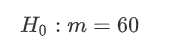 </br>
Альтернативная гипотеза: значение медианы получения ответа с помощью чат-бота () не равно 60 секунд.</br> 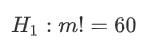

In [14]:
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]

# проводим тест
_, p = sign_test(data, 60)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: время получения ответа изменилось и больше не составляет 60 секунд.

<font color='yellow'>U-КРИТЕРИЙ МАННА — УИТНИ</font>

БИЗНЕС-ЗАДАЧА

Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Бизнес-заказчик просит проверить, изменилось ли время получения ответа после внедрения чат-бота. </br>
Чтобы это выяснить, замерили время ответа с помощью чат-бота для 30 случайно выбранных вопросов, а также время ответа через звонок оператору для ещё 30 случайно выбранных вопросов . В результате получили следующие данные (в секундах):</br>
Чат-бот: 55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59.</br>
Звонок оператору: 72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63.</br>
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы:</br>
- Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.
- Альтернативная гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору неодинаковы.

In [15]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [55, 53, 60, 49, 45, 57, 46, 53, 59, 53, 53, 55, 42, 41, 59, 43, 47, 60, 50, 57, 59, 56, 52, 48, 59, 53, 59, 50, 59, 59]
data_operator = [72, 80, 66, 72, 75, 71, 73, 71, 75, 68, 63, 68, 62, 65, 77, 66, 67, 62, 60, 74, 61, 67, 61, 63, 62, 79, 61, 63, 62, 63]

# проводим тест
_, p = stats.mannwhitneyu(data_chat_bot, data_operator)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: время получения ответа изменилось после внедрения чат-бота.

<font color='yellow'>КРИТЕРИЙ УИЛКОКСОНА</font>

БИЗНЕС-ЗАДАЧА</br>
Чтобы отвечать на наиболее часто встречающиеся вопросы о заказах, онлайн-магазин добавил на сайт чат-бота. До этого покупатели могли получить ответ на вопрос через звонок оператору. Планировалось, что нововведение приведёт к уменьшению времени получения ответа. </br>
Бизнес-заказчик просит узнать, действительно ли получить ответ с помощью чат-бота быстрее, чем через звонок оператору. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер необходимо делать на одних и тех же вопросах.</br>
Чтобы решить задачу, для 30 случайно выбранных вопросов сначала замерили время ответа с помощью чат-бота, а затем — время ответа через звонок оператору. В результате получили следующие данные (в секундах):</br>
Чат-бот: 71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73.</br>
Звонок оператору: 114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106.</br>
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ</br>
Сформулируем гипотезы в математическом виде:</br>
- Нулевая гипотеза: распределения времени получения ответа через чат-бота и через звонок оператору одинаковы.</br>
- Альтернативная гипотеза: распределение времени получения ответа через чат-бота меньше, чем распределение времени через звонок оператору.

In [16]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [71, 97, 71, 97, 83, 90, 83, 94, 88, 76, 79, 99, 82, 85, 93, 78, 76, 87, 73, 72, 89, 89, 71, 86, 78, 93, 86, 95, 83, 73]
data_operator = [114, 112, 115, 124, 101, 108, 104, 109, 103, 115, 100, 129, 120, 129, 117, 125, 112, 105, 128, 107, 120, 108, 129, 100, 116, 105, 128, 128, 120, 106]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: время получения ответа через чат-бота меньше, чем через звонок оператору.

<font color='yellow'>КРИТЕРИЙ КРАСКЕЛА — УОЛЛИСА</font>

БИЗНЕС-ЗАДАЧА

У онлайн-магазина существуют три независимых уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности.</br>
Чтобы это выяснить, случайным образом выбрали по 30 вопросов для каждого уровня и замерили для них время ответа с помощью чат-бота. В результате получили следующие данные (в секундах):</br>
Базовый: 106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98.</br>
Серебряный: 96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116.</br>
Золотой: 99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111.</br>
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы в математическом виде:</br>
- Нулевая гипотеза: медианы времени обработки вопросов от покупателей уровней базовый (), серебряный () и золотой () равны.</br>
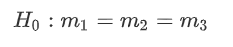</br>
- Альтернативная гипотеза: медианы времени обработки вопросов от покупателей уровней базовый (), серебряный () и золотой () не равны.</br>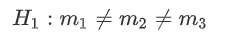

In [17]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [106, 96, 105, 119, 91, 118, 108, 98, 103, 102, 98, 97, 104, 100, 94, 94, 98, 103, 95, 93, 118, 91, 96, 115, 119, 111, 102, 118, 91, 98 ]
data_silver = [96, 95, 102, 103, 96, 120, 97, 112, 108, 90, 99, 93, 91, 91, 119, 95, 110, 108, 117, 99, 100, 99, 119, 98, 101, 95, 118, 110, 114, 116]
data_gold = [99, 106, 92, 97, 98, 95, 119, 120, 116, 93, 102, 109, 98, 99, 100, 113, 91, 96, 119, 96, 95, 112, 111, 110, 102, 112, 105, 93, 111, 111]

# проводим тест
_, p = stats.kruskal(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.837
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что есть разница во времени обработки вопросов от покупателей разных уровней лояльности.

<font color='yellow'>КРИТЕРИЙ ФРИДМАНА</font>

БИЗНЕС-ЗАДАЧА

У онлайн-магазина существуют три связанных между собой уровня программы лояльности: «Базовый», «Серебряный» и «Золотой». Вопросы покупателей, на которые не может ответить чат-бот, направляются оператору. Чтобы вопросы от покупателей более высокого уровня лояльности обрабатывались быстрее, разработали систему ранжирования вопросов. Бизнес-заказчик просит проверить, действительно ли есть разница во времени обработки вопроса для покупателей разных уровней лояльности. Эксперты в предметной области говорят, что время ответа сильно зависит от вопроса покупателя, поэтому замер стоит делать на одних и тех же вопросах.</br>
Чтобы решить задачу, случайным образом выбрали 30 вопросов и замерили на них время ответа с помощью чат-бота для трёх уровней лояльности. В результате получили следующие данные (в секундах):</br>
«Базовый»: 113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103.</br>
«Серебряный»: 89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82.</br>
«Золотой»: 62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65.</br>
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы:</br>
- Нулевая гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» одинаковы.
- Альтернативная гипотеза: распределения времени обработки вопросов от покупателей уровней «Базовый», «Серебряный» и «Золотой» неодинаковы.

In [18]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [113, 115, 108, 104, 107, 96, 114, 103, 103, 120, 92, 103, 120, 100, 110, 106, 112, 99, 118, 113, 102, 94, 92, 109, 91, 113, 95, 107, 110, 103]
data_silver = [89, 80, 95, 77, 82, 98, 84, 83, 73, 93, 89, 78, 90, 73, 83, 73, 84, 90, 75, 75, 86, 88, 72, 72, 96, 75, 87, 99, 80, 82]
data_gold = [62, 84, 67, 71, 64, 89, 65, 70, 86, 77, 84, 81, 89, 68, 87, 70, 70, 61, 82, 79, 60, 62, 88, 61, 76, 87, 79, 90, 77, 65]

# проводим тест
_, p = stats.friedmanchisquare(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: время обработки вопросов для покупателей разных уровней лояльности различно.

задачи

In [19]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_chat_bot = [51, 46, 40, 48, 44, 42, 48, 36, 44, 35, 42, 52, 38, 33, 40, 43, 51, 38, 36, 47, 42, 44, 47, 36, 41, 46, 33, 51, 49, 41]
data_operator = [46, 44, 47, 51, 52, 37, 46, 49, 45, 40, 32, 41, 48, 36, 37, 39, 37, 42, 46, 38, 42, 35, 41, 41, 42, 33, 47, 49, 36, 37]

# проводим тест
_, p = stats.wilcoxon(data_chat_bot, data_operator, alternative = 'less')

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.742
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [20]:
from statsmodels.stats.descriptivestats import sign_test

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [77, 78, 74, 81, 87, 73, 80, 72, 73, 81, 88, 74, 74, 79, 78, 73, 89, 82, 77, 77, 88, 75, 80, 88, 72, 84, 88, 74, 74, 78]

# проводим тест
_, p = sign_test(data, 75)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.136
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [21]:
# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_basic = [57, 56, 64, 62, 64, 63, 57, 64, 57, 63, 62, 59, 61, 61, 62, 57, 55, 60, 56, 62, 64, 56, 62, 62, 65]
data_silver = [56, 56, 60, 64, 62, 63, 63, 56, 64, 60, 58, 61, 59, 63, 62, 63, 59, 64, 63, 58, 61, 61, 62, 55, 61]
data_gold = [65, 67, 65, 69, 66, 65, 62, 63, 65, 69, 64, 61, 69, 69, 62, 68, 65, 69, 62, 67, 63, 69, 63, 67, 61]

# проводим тест
_, p = stats.kruskal(data_basic, data_silver, data_gold)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


###   <font color='yellow'>Статистические тесты для категориальных признаков</font>

<font color='yellow'>КРИТЕРИЙ ХИ-КВАДРАТ</font>

БИЗНЕС-ЗАДАЧА

Оператор сотовой связи хочет узнать, есть ли связь между тарифом, который выбрал клиент, и наличием у него детей. </br>
Были собраны необходимые данные по 39 случайным клиентам.</br>
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы:</br>
- Нулевая гипотеза: признаки «Тариф» и «Наличие детей» независимы.
- Альтернативная гипотеза: признаки «Тариф» и «Наличие детей» взаимосвязаны.

In [24]:
import scipy.stats as stats
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_tarif_children.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что признаки «Тариф» и «Наличие детей» взаимосвязаны.

<font color='yellow'>КРИТЕРИЙ МАК-НЕМАРА</font>

БИЗНЕС-ЗАДАЧА

Оператор сотовой связи хочет увеличить долю клиентов, которые пользуются мобильным приложением. Для этого провели соответствующую рекламную кампанию. Необходимо узнать, изменилась ли доля клиентов, пользующихся приложением, после проведения рекламной кампании.</br>
Были собраны данные об использовании приложения по 30 случайным клиентам до и после рекламной кампании.</br>
Уровень значимости необходимо взять равным 0.05.

РЕШЕНИЕ

Сформулируем гипотезы:</br>
- Нулевая гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, не изменилась.
- Альтернативная гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась.

In [27]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_usage.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['До'], data['После'])

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась.

задачи

In [29]:
data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], ['Нет', 'Нет'], ['Нет', 'Нет'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Нет']], columns=['Старая форма', 'Новая форма'])
# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Старая форма'], data['Новая форма'])
display(table)

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Новая форма   Есть  Нет
Старая форма           
Есть             7    3
Нет             12    8

p-value = 0.035
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.
